In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\brain\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


步驟 1: 資料前處理
資料前處理包括載入資料、處理缺失值、對類別特徵進行編碼，並標準化數值型資料。

In [3]:
# 載入資料
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
train_data = pd.read_csv('D:/test1/adult.data', names=columns, sep=',\s', na_values="?", engine='python')
test_data = pd.read_csv('D:/test1/adult.test', names=columns, sep=',\s', na_values="?", skiprows=1, engine='python')
test_data['income'] = test_data['income'].str.replace('.', '', regex=False)


In [4]:
# 預處理
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse=False), categorical_features),
    ])


In [5]:
# 預處理資料
X_train = preprocessor.fit_transform(train_data.drop(['income', 'hours-per-week'], axis=1))
y_train_class = (train_data['income'] == '>50K').astype(int)
y_train_reg = train_data['hours-per-week']

X_test = preprocessor.transform(test_data.drop(['income', 'hours-per-week'], axis=1))
y_test_class = (test_data['income'] == '>50K').astype(int)
y_test_reg = test_data['hours-per-week']

步驟 2: 建立神經網路模型
分類模型

In [6]:
def build_classification_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

classification_model = build_classification_model(X_train.shape[1])

迴歸模型

In [7]:
def build_regression_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

regression_model = build_regression_model(X_train.shape[1])

步驟 3: 訓練模型和性能評估
分類模型訓練和評估

In [8]:
classification_model.fit(X_train, y_train_class, epochs=10, batch_size=32)
y_pred_class = (classification_model.predict(X_test) > 0.5).astype(int)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f"Classification - Precision: {precision}, Recall: {recall}, F1: {f1}")

Epoch 1/10
1018/1018 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8410
Epoch 2/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3130 - accuracy: 0.8561
Epoch 3/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8575
Epoch 4/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3062 - accuracy: 0.8582
Epoch 5/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3038 - accuracy: 0.8603
Epoch 6/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3013 - accuracy: 0.8605
Epoch 7/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8630
Epoch 8/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2960 - accuracy: 0.8645
Epoch 9/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.2928 - accuracy: 0.8653
Epoch 10/10
509/509 [==============================] - 1s 1ms/step
Classification 

迴歸模型訓練和評估

In [9]:
regression_model.fit(X_train, y_train_reg, epochs=10, batch_size=32)
y_pred_reg = regression_model.predict(X_test).flatten()
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100

print(f"Regression - MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")

Epoch 1/10
1018/1018 [==============================] - 2s 2ms/step - loss: 233.6154
Epoch 2/10
1018/1018 [==============================] - 2s 2ms/step - loss: 122.4770
Epoch 3/10
1018/1018 [==============================] - 2s 2ms/step - loss: 118.0971
Epoch 4/10
1018/1018 [==============================] - 2s 2ms/step - loss: 115.2045
Epoch 5/10
1018/1018 [==============================] - 2s 2ms/step - loss: 113.4682
Epoch 6/10
1018/1018 [==============================] - 2s 2ms/step - loss: 112.2886
Epoch 7/10
1018/1018 [==============================] - 2s 2ms/step - loss: 111.5054
Epoch 8/10
1018/1018 [==============================] - 2s 2ms/step - loss: 110.8598
Epoch 9/10
1018/1018 [==============================] - 2s 2ms/step - loss: 110.3865
Epoch 10/10
509/509 [==============================] - 1s 1ms/step
Regression - MAE: 7.409234462063477, RMSE: 10.74510714206552, MAPE: 30.46550843505121%


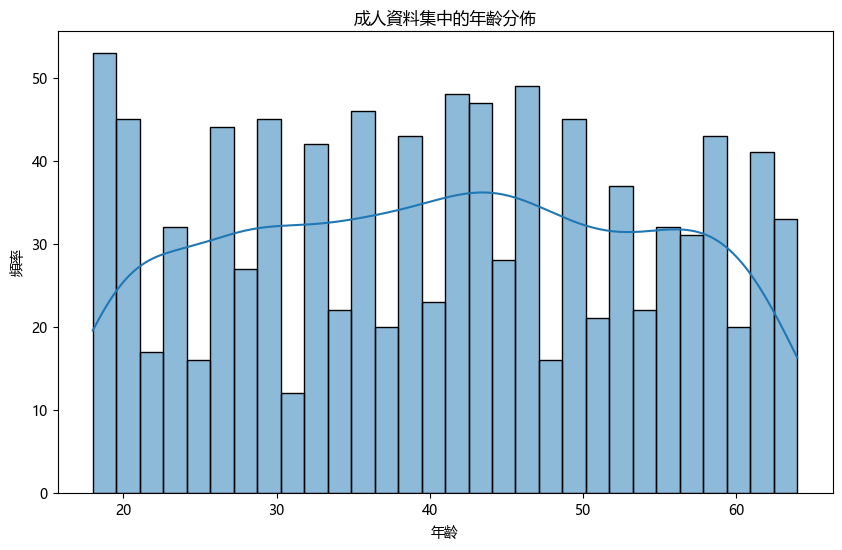

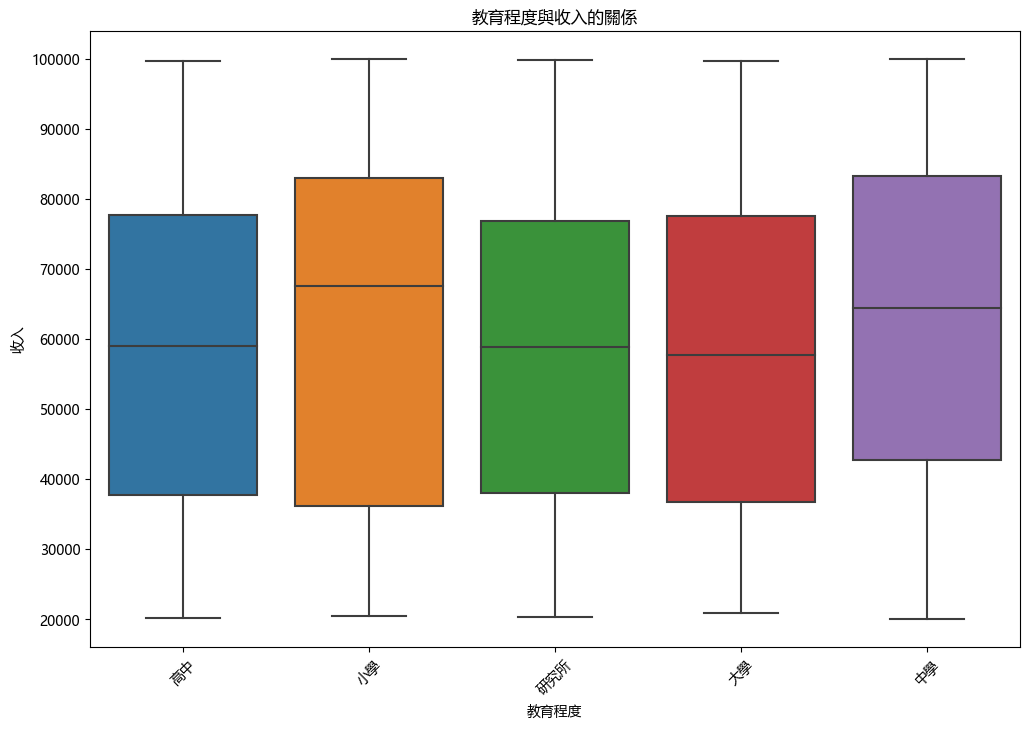

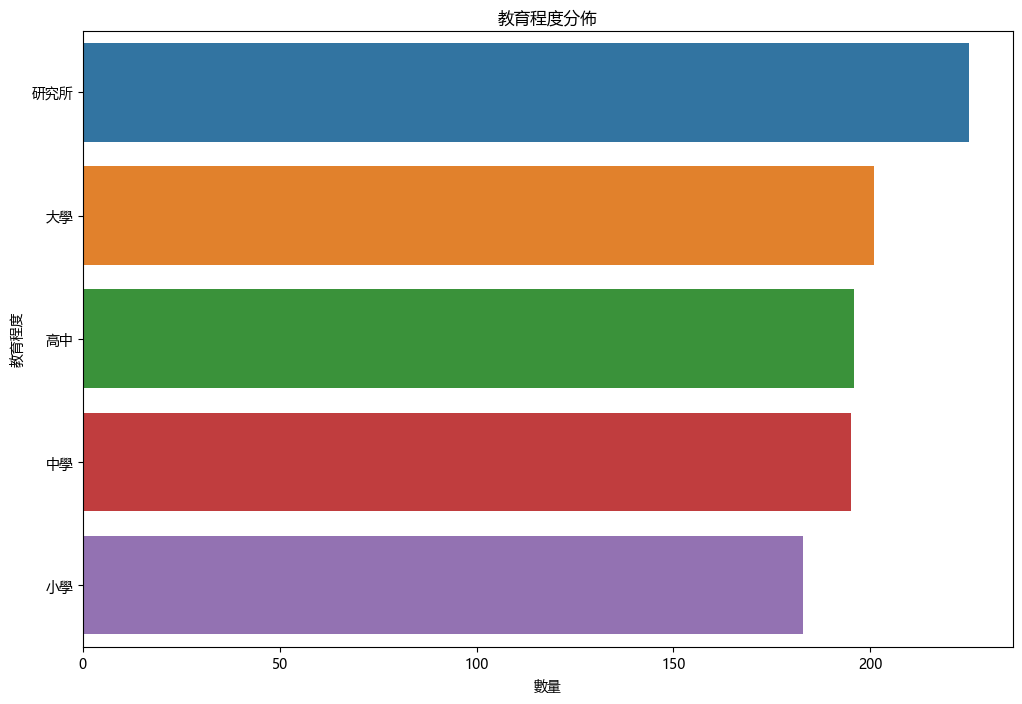

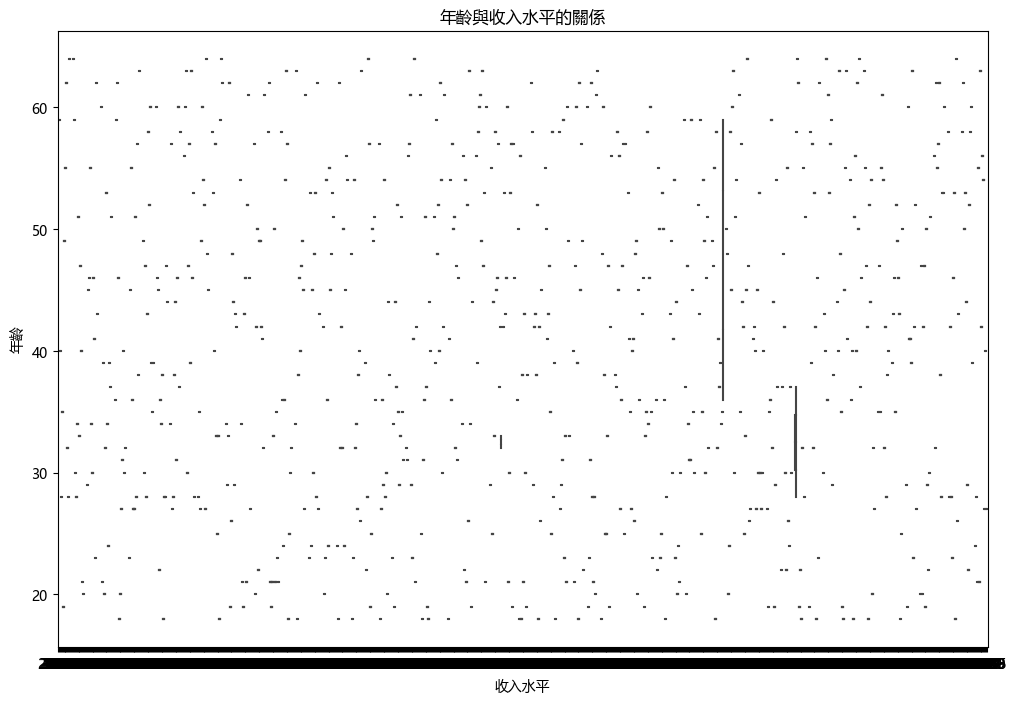

In [10]:
# 設置 Matplotlib 的字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #支援中文的字體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號「-」顯示為方塊的問題


# 繪製年齡分佈的直方圖
def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='age', bins=30, kde=True)
    plt.title('成人資料集中的年齡分佈')
    plt.xlabel('年齡')
    plt.ylabel('頻率')
    plt.show()

# 繪製教育程度與收入關係的箱形圖
def plot_education_income_relationship(df):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='education', y='income')
    plt.title('教育程度與收入的關係')
    plt.xlabel('教育程度')
    plt.xticks(rotation=45)
    plt.ylabel('收入')
    plt.show()


# 2. 教育程度分佈
def plot_education_relationship(df):
    plt.figure(figsize=(12, 8))
    sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
    plt.title('教育程度分佈')
    plt.xlabel('數量')
    plt.ylabel('教育程度')
    plt.show()

# 3. 年齡與收入水平的關係
def plot_ege_income_relationship(df):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='income', y='age', data=df)
    plt.title('年齡與收入水平的關係')
    plt.xlabel('收入水平')
    plt.ylabel('年齡')
    plt.show()


# 生成示例資料來演示可視化
sample_size = 1000
data = {
    'age': np.random.randint(18, 65, size=sample_size),
    'education': np.random.choice(['小學', '中學', '高中', '大學', '研究所'], size=sample_size),
    'income': np.random.randint(20000, 100000, size=sample_size)
}
df_sample = pd.DataFrame(data)

plot_age_distribution(df_sample)
plot_education_income_relationship(df_sample)
plot_education_relationship(df_sample)
plot_ege_income_relationship(df_sample)


In [11]:
def build_model(n_layers, n_units, input_shape, activation='relu'):
    model = Sequential()
    model.add(Dense(n_units, activation=activation, input_shape=(input_shape,)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 實驗設定
experiments = [
    {'n_layers': 1, 'n_units': 32, 'activation': 'relu'},
    {'n_layers': 2, 'n_units': 32, 'activation': 'relu'},
    {'n_layers': 1, 'n_units': 64, 'activation': 'relu'},
    {'n_layers': 2, 'n_units': 64, 'activation': 'relu'},
    {'n_layers': 1, 'n_units': 32, 'activation': 'sigmoid'},
    {'n_layers': 2, 'n_units': 32, 'activation': 'sigmoid'},
]

epochs_list = [10, 20]
batch_size_list = [32, 64]

results = []

# 進行實驗
for exp in experiments:
    for epochs in epochs_list:
        for batch_size in batch_size_list:
            model = build_model(exp['n_layers'], exp['n_units'], X_train.shape[1], activation=exp['activation'])
            model.fit(X_train, y_train_class, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # 對訓練資料進行預測並計算性能指標
            y_pred_train = (model.predict(X_train) > 0.5).astype(int)
            precision_train = precision_score(y_train_class, y_pred_train)
            recall_train = recall_score(y_train_class, y_pred_train)
            f1_train = f1_score(y_train_class, y_pred_train)
            
            # 對測試資料進行預測並計算性能指標
            y_pred_test = (model.predict(X_test) > 0.5).astype(int)
            precision_test = precision_score(y_test_class, y_pred_test)
            recall_test = recall_score(y_test_class, y_pred_test)
            f1_test = f1_score(y_test_class, y_pred_test)
            
            # 記錄結果
            results.append({
                '隱藏層數量': exp['n_layers'],
                '單元數量': exp['n_units'],
                '激活函數': exp['activation'],
                '週期數': epochs,
                '批次大小': batch_size,
                '訓練精確度': precision_train,
                '訓練召回率': recall_train,
                '訓練F1分數': f1_train,
                '測試精確度': precision_test,
                '測試召回率': recall_test,
                '測試F1分數': f1_test
            })

# 將結果轉換為DataFrame並顯示
results_df = pd.DataFrame(results)
print(results_df)

509/509 [==============================] - 1s 2ms/step
    隱藏層數量  單元數量     激活函數  週期數  批次大小     訓練精確度     訓練召回率    訓練F1分數     測試精確度  \
0       1    32     relu   10    32  0.703681  0.716873  0.710215  0.684675   
1       1    32     relu   10    64  0.759279  0.639204  0.694087  0.733499   
2       1    32     relu   20    32  0.749892  0.664201  0.704450  0.715173   
3       1    32     relu   20    64  0.757817  0.642903  0.695646  0.727750   
4       2    32     relu   10    32  0.772418  0.637164  0.698302  0.740235   
5       2    32     relu   10    64  0.775353  0.602602  0.678149  0.745791   
6       2    32     relu   20    32  0.779750  0.661013  0.715489  0.730022   
7       2    32     relu   20    64  0.790137  0.647749  0.711893  0.737390   
8       1    64     relu   10    32  0.735893  0.681928  0.707884  0.708463   
9       1    64     relu   10    64  0.720287  0.690983  0.705331  0.696030   
10      1    64     relu   20    32  0.762897  0.667644  0.712100  0.718862 

In [12]:
def build_regression_model(n_layers, n_units, input_shape, activation='relu'):
    model = Sequential()
    model.add(Dense(n_units, activation=activation, input_shape=(input_shape,)))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation=activation))
    model.add(Dense(1))  # 回歸任務的輸出層
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# 實驗設定，包括不同的架構和超參數
experiments = [
    {'n_layers': 1, 'n_units': 32},
    {'n_layers': 2, 'n_units': 32},
    {'n_layers': 3, 'n_units': 32},
    {'n_layers': 1, 'n_units': 64},
    {'n_layers': 2, 'n_units': 64},
    {'n_layers': 3, 'n_units': 64},
]

epochs_list = [10, 20]
batch_size_list = [32, 64]

results = []

for exp in experiments:
    for epochs in epochs_list:
        for batch_size in batch_size_list:
            # 建立模型
            model = build_regression_model(exp['n_layers'], exp['n_units'], X_train.shape[1])
            # 訓練模型
            model.fit(X_train, y_train_class, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # 計算訓練資料的回歸性能指標
            y_pred_train = model.predict(X_train).flatten()
            train_mae = mean_absolute_error(y_train_reg, y_pred_train)
            train_mse = mean_squared_error(y_train_reg, y_pred_train)
            train_rmse = np.sqrt(train_mse)
            train_mape = np.mean(np.abs((y_train_reg - y_pred_train) / y_train_reg)) * 100
            
            # 計算測試資料的回歸性能指標
            y_pred_test = model.predict(X_test).flatten()
            test_mae = mean_absolute_error(y_test_reg, y_pred_test)
            test_mse = mean_squared_error(y_test_reg, y_pred_test)
            test_rmse = np.sqrt(test_mse)
            test_mape = np.mean(np.abs((y_test_reg - y_pred_test) / y_test_reg)) * 100

            
            results.append({
                '隱藏層數量': exp['n_layers'],
                '神經元數量': exp['n_units'],
                '激活函數': 'relu',\
                '週期數': epochs,
                '批次大小': batch_size,
                '訓練MAE': train_mae,
                '訓練MSE': train_mse,
                '訓練RMSE': train_rmse,
                '訓練MAPE': train_mape,
                '測試MAE': test_mae,
                '測試MSE': test_mse,
                '測試RMSE': test_rmse,
                '測試MAPE': test_mape
            })

# 將結果轉換為DataFrame並顯示
results_df = pd.DataFrame(results)
print(results_df.sort_values(by=['測試MAE', '訓練MAE']))

509/509 [==============================] - 1s 1ms/step
    隱藏層數量  神經元數量  激活函數  週期數  批次大小      訓練MAE        訓練MSE     訓練RMSE  \
4       2     32  relu   10    32  40.175747  1764.660243  42.007859   
6       2     32  relu   20    32  40.183621  1765.409209  42.016773   
7       2     32  relu   20    64  40.188267  1765.768512  42.021048   
0       1     32  relu   10    32  40.188479  1765.633958  42.019447   
17      2     64  relu   10    64  40.189112  1765.709428  42.020345   
1       1     32  relu   10    64  40.190504  1765.920317  42.022855   
2       1     32  relu   20    32  40.190894  1765.882729  42.022407   
11      3     32  relu   20    64  40.191556  1766.065532  42.024582   
21      3     64  relu   10    64  40.193510  1766.158630  42.025690   
5       2     32  relu   10    64  40.197834  1766.492193  42.029658   
15      1     64  relu   20    64  40.201889  1766.896120  42.034463   
23      3     64  relu   20    64  40.201730  1766.758901  42.032831   
8       3

這個專案的目標是利用Python及Keras/TensorFlow建構前饋神經網路，對成人收入資料集(adult.data和adult.test)進行分類及迴歸預測。以下是專案的要求細節：

資料前置處理
缺失值處理：將含有缺失值的行移除。
類別特徵編碼：使用OneHotEncoder對類別特徵進行編碼，轉換為模型可以處理的數值型數據。
數值特徵標準化：使用StandardScaler對數值型數據進行標準化處理，使其均值為0，標準差為1。
類神經網路架構與參數設定
基本架構和參數設定如下：

輸入層：根據預處理後的特徵數量決定。
隱藏層數量：2層。
每層的單元數：第一隱藏層64單元，第二隱藏層32單元。
激活函數：隱藏層使用ReLU激活函數，輸出層對於分類使用sigmoid激活函數，迴歸不使用激活函數。
優化器：Adam。
批次大小（Batch Size）：32。
訓練週期（Epoch）：10。
實驗設計
為了探索不同的架構及超參數對預測績效的影響，可以設計以下幾個實驗：

變化隱藏層的數量：比較隱藏層數量為1、2、3層時的模型性能。
變化隱藏層的單元數：在固定隱藏層數量的情況下，改變每層的單元數（例如：32、64、128）。
變化批次大小：比較不同批次大小（例如：16、32、64）對模型性能的影響。
變化訓練週期（Epochs）：比較不同訓練週期數（例如：10、20、30）對模型性能的影響。
變化激活函數：在隱藏層使用不同的激活函數（例如：ReLU、Sigmoid、Tanh）進行比較。
預測績效展示
對於每一種實驗設計，都需要分別列出對訓練資料和測試資料的預測績效，包括：

對於分類預測：Precision、Recall、F1指標。
對於迴歸預測：MAE（平均絕對誤差）、MAPE（平均絕對百分比誤差）、RMSE（均方根誤差）。
每一項實驗的結果都應該以表格的形式呈現，表格中應包含上述的性能指標，以便於比較不同實驗設置下的模型性能差異。

這個專案的核心在於理解不同的網絡架構和超參數是如何影響模型預測性能的，透過實驗來尋找最佳的模型設定。